In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from datetime import datetime

In [426]:
df = pd.read_csv('Ames_Housing_Data.csv')
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# let's check duplicates

In [427]:
df.duplicated().sum()

0

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [429]:
df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [430]:
df.drop('PID',axis = 1,inplace = True)

# check missing values

In [431]:
100 * (df.select_dtypes(['int','float']).isna().sum()/len(df))

MS SubClass         0.000000
Lot Frontage       16.723549
Lot Area            0.000000
Overall Qual        0.000000
Overall Cond        0.000000
Year Built          0.000000
Year Remod/Add      0.000000
Mas Vnr Area        0.784983
BsmtFin SF 1        0.034130
BsmtFin SF 2        0.034130
Bsmt Unf SF         0.034130
Total Bsmt SF       0.034130
1st Flr SF          0.000000
2nd Flr SF          0.000000
Low Qual Fin SF     0.000000
Gr Liv Area         0.000000
Bsmt Full Bath      0.068259
Bsmt Half Bath      0.068259
Full Bath           0.000000
Half Bath           0.000000
Bedroom AbvGr       0.000000
Kitchen AbvGr       0.000000
TotRms AbvGrd       0.000000
Fireplaces          0.000000
Garage Yr Blt       5.426621
Garage Cars         0.034130
Garage Area         0.034130
Wood Deck SF        0.000000
Open Porch SF       0.000000
Enclosed Porch      0.000000
3Ssn Porch          0.000000
Screen Porch        0.000000
Pool Area           0.000000
Misc Val            0.000000
Mo Sold       

In [432]:
100 * (df.select_dtypes('object').isna().sum()/len(df))

MS Zoning          0.000000
Street             0.000000
Alley             93.242321
Lot Shape          0.000000
Land Contour       0.000000
Utilities          0.000000
Lot Config         0.000000
Land Slope         0.000000
Neighborhood       0.000000
Condition 1        0.000000
Condition 2        0.000000
Bldg Type          0.000000
House Style        0.000000
Roof Style         0.000000
Roof Matl          0.000000
Exterior 1st       0.000000
Exterior 2nd       0.000000
Mas Vnr Type      60.580205
Exter Qual         0.000000
Exter Cond         0.000000
Foundation         0.000000
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Bsmt Exposure      2.832765
BsmtFin Type 1     2.730375
BsmtFin Type 2     2.764505
Heating            0.000000
Heating QC         0.000000
Central Air        0.000000
Electrical         0.034130
Kitchen Qual       0.000000
Functional         0.000000
Fireplace Qu      48.532423
Garage Type        5.358362
Garage Finish      5.426621
Garage Qual        5

# remove columns and rows with the largest number of gaps

In [433]:
df.dropna(axis = 1,thresh=int(0.70*len(df)),inplace = True)


In [434]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].mode()[0])

In [435]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mode()[0])

In [436]:
df[df.select_dtypes('object').columns] = df[df.select_dtypes('object').columns].fillna('None')

In [437]:
df.dropna(axis=0,subset= ['Mas Vnr Area','BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area'],inplace = True)

In [438]:
100 * (df.select_dtypes(['int','float']).isna().sum()/len(df))

MS SubClass        0.0
Lot Frontage       0.0
Lot Area           0.0
Overall Qual       0.0
Overall Cond       0.0
Year Built         0.0
Year Remod/Add     0.0
Mas Vnr Area       0.0
BsmtFin SF 1       0.0
BsmtFin SF 2       0.0
Bsmt Unf SF        0.0
Total Bsmt SF      0.0
1st Flr SF         0.0
2nd Flr SF         0.0
Low Qual Fin SF    0.0
Gr Liv Area        0.0
Bsmt Full Bath     0.0
Bsmt Half Bath     0.0
Full Bath          0.0
Half Bath          0.0
Bedroom AbvGr      0.0
Kitchen AbvGr      0.0
TotRms AbvGrd      0.0
Fireplaces         0.0
Garage Yr Blt      0.0
Garage Cars        0.0
Garage Area        0.0
Wood Deck SF       0.0
Open Porch SF      0.0
Enclosed Porch     0.0
3Ssn Porch         0.0
Screen Porch       0.0
Pool Area          0.0
Misc Val           0.0
Mo Sold            0.0
Yr Sold            0.0
SalePrice          0.0
dtype: float64

In [439]:
100 * (df.select_dtypes('object').isna().sum()/len(df))

MS Zoning         0.0
Street            0.0
Lot Shape         0.0
Land Contour      0.0
Utilities         0.0
Lot Config        0.0
Land Slope        0.0
Neighborhood      0.0
Condition 1       0.0
Condition 2       0.0
Bldg Type         0.0
House Style       0.0
Roof Style        0.0
Roof Matl         0.0
Exterior 1st      0.0
Exterior 2nd      0.0
Exter Qual        0.0
Exter Cond        0.0
Foundation        0.0
Bsmt Qual         0.0
Bsmt Cond         0.0
Bsmt Exposure     0.0
BsmtFin Type 1    0.0
BsmtFin Type 2    0.0
Heating           0.0
Heating QC        0.0
Central Air       0.0
Electrical        0.0
Kitchen Qual      0.0
Functional        0.0
Garage Type       0.0
Garage Finish     0.0
Garage Qual       0.0
Garage Cond       0.0
Paved Drive       0.0
Sale Type         0.0
Sale Condition    0.0
dtype: float64

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2904 entries, 0 to 2929
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2904 non-null   int64  
 1   MS Zoning        2904 non-null   object 
 2   Lot Frontage     2904 non-null   float64
 3   Lot Area         2904 non-null   int64  
 4   Street           2904 non-null   object 
 5   Lot Shape        2904 non-null   object 
 6   Land Contour     2904 non-null   object 
 7   Utilities        2904 non-null   object 
 8   Lot Config       2904 non-null   object 
 9   Land Slope       2904 non-null   object 
 10  Neighborhood     2904 non-null   object 
 11  Condition 1      2904 non-null   object 
 12  Condition 2      2904 non-null   object 
 13  Bldg Type        2904 non-null   object 
 14  House Style      2904 non-null   object 
 15  Overall Qual     2904 non-null   int64  
 16  Overall Cond     2904 non-null   int64  
 17  Year Built       29

In [441]:
df_num = df.select_dtypes(['int','float'])
df_num.corr()['SalePrice'].sort_values()

Enclosed Porch    -0.130212
Kitchen AbvGr     -0.120255
Overall Cond      -0.099763
MS SubClass       -0.083635
Low Qual Fin SF   -0.037353
Bsmt Half Bath    -0.034749
Yr Sold           -0.027840
Misc Val          -0.015321
BsmtFin SF 2       0.008038
Mo Sold            0.030579
3Ssn Porch         0.032933
Pool Area          0.069106
Screen Porch       0.114275
Bedroom AbvGr      0.144916
Bsmt Unf SF        0.183384
Lot Area           0.265793
2nd Flr SF         0.271352
Bsmt Full Bath     0.276715
Half Bath          0.281998
Open Porch SF      0.307222
Wood Deck SF       0.328809
Lot Frontage       0.332239
BsmtFin SF 1       0.433777
Garage Yr Blt      0.444418
Fireplaces         0.474892
TotRms AbvGrd      0.496264
Mas Vnr Area       0.508607
Year Remod/Add     0.532091
Full Bath          0.545995
Year Built         0.558273
1st Flr SF         0.625438
Total Bsmt SF      0.634478
Garage Area        0.639164
Garage Cars        0.646970
Gr Liv Area        0.708251
Overall Qual       0

# Check outliers

<ipython-input-442-ee23fe7e19e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

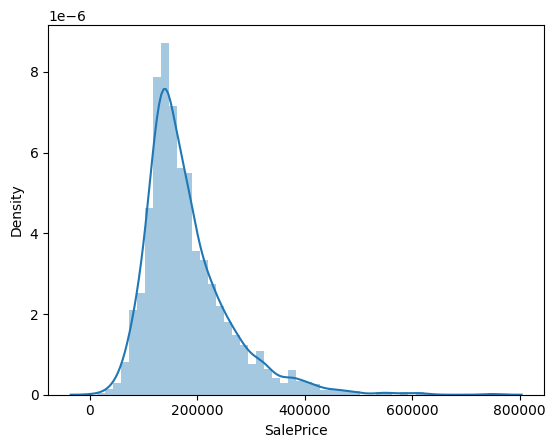

In [442]:
sns.distplot(df['SalePrice'])

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

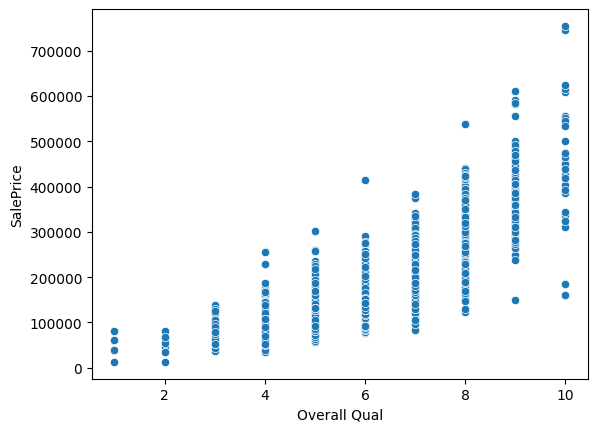

In [443]:
def scatter(data,x,y):
  return sns.scatterplot(data = data, x = x, y = y)
scatter(df,'Overall Qual','SalePrice')

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

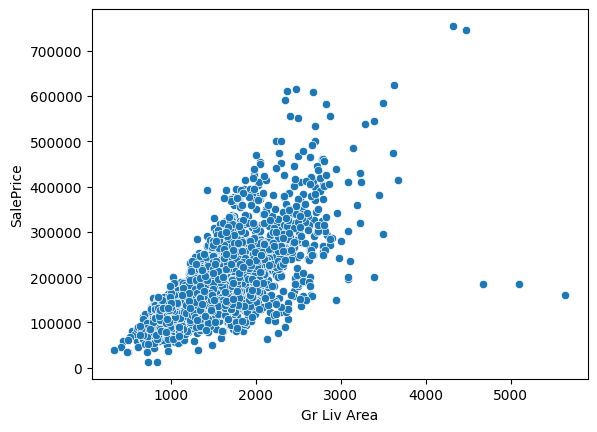

In [444]:
scatter(df,'Gr Liv Area','SalePrice')

<Axes: xlabel='Garage Cars', ylabel='SalePrice'>

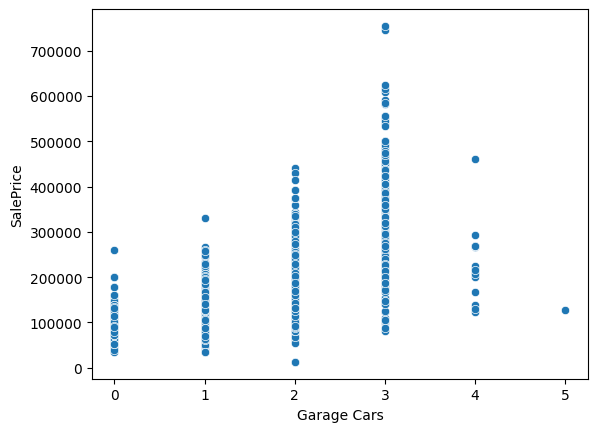

In [445]:
scatter(df,'Garage Cars','SalePrice')

<Axes: xlabel='Garage Area', ylabel='SalePrice'>

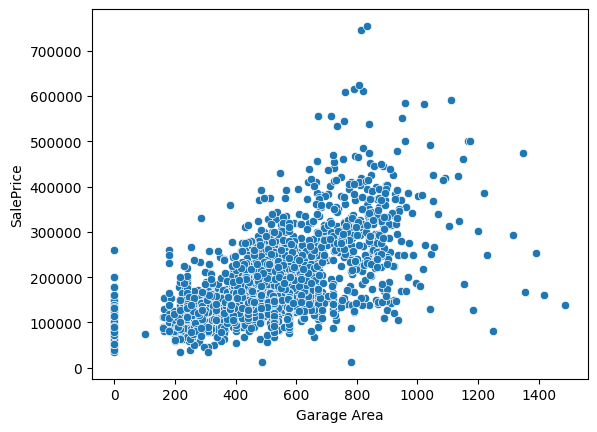

In [446]:
scatter(df,'Garage Area','SalePrice')

In [447]:
ind_drop_liv = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df = df.drop(ind_drop_liv,axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

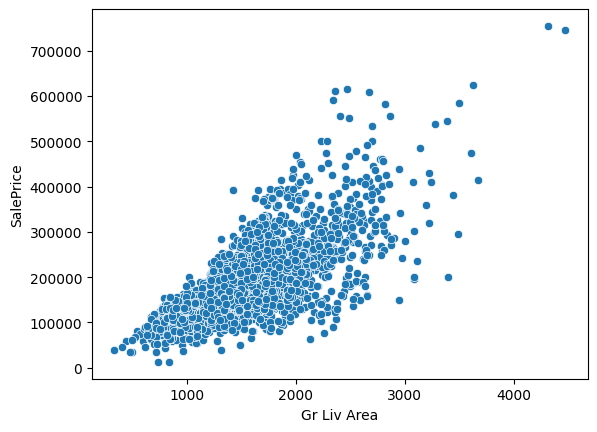

In [448]:
scatter(df,'Gr Liv Area','SalePrice')

In [449]:
ind_drop_gar = df[(df['Garage Area']>700) & (df['SalePrice']>700000)].index
df = df.drop(ind_drop_gar,axis=0)

<Axes: xlabel='Garage Area', ylabel='SalePrice'>

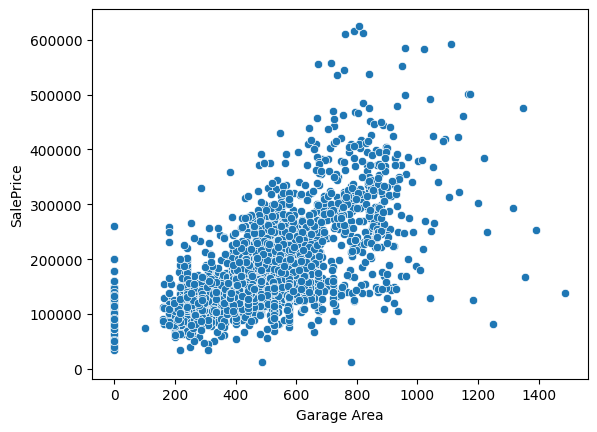

In [450]:
scatter(df,'Garage Area','SalePrice')

<Axes: xlabel='Garage Area', ylabel='SalePrice'>

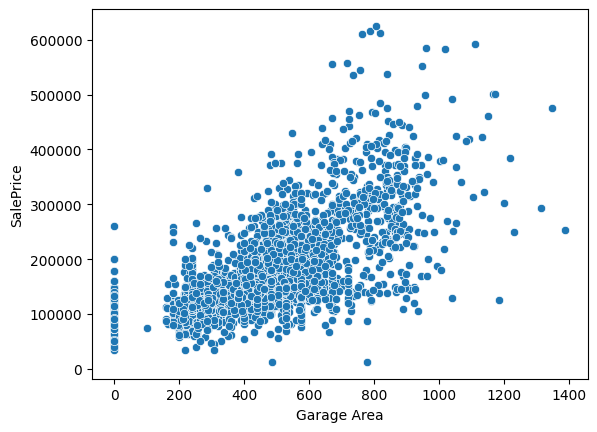

In [451]:
ind_drop_gar = df[(df['Garage Area']>1200) & (df['SalePrice']<200000)].index
df = df.drop(ind_drop_gar,axis=0)
scatter(df,'Garage Area','SalePrice')

# Feature Engineering

In [467]:
df_int = df.select_dtypes(exclude= 'object')
df_obj = df.select_dtypes(include= 'object')
df_obj = pd.get_dummies(df_obj,drop_first=True, dtype='int')
df_final = pd.concat([df_int,df_obj], axis = 1)
df_final['price per square m.'] = df_final['SalePrice']/df_final['Gr Liv Area']
df_final['old'] = datetime.now().year - df_final['Year Built']
df_final

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,price per square m.,old
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,1,0,0,0,1,0,129.830918,64
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,0,0,0,1,0,117.187500,63
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,0,0,0,1,0,129.420617,66
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,1,0,0,0,1,0,115.639810,56
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,0,0,0,1,0,116.574586,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,...,0,0,1,0,0,0,1,0,142.073779,40
2926,20,60.0,8885,5,5,1983,1983,0.0,301.0,324.0,...,0,0,1,0,0,0,1,0,145.232816,41
2927,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,0,0,0,1,0,136.082474,32
2928,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,1,0,0,0,1,0,122.390209,50


# Creat model

In [468]:
X = df_final.drop('SalePrice',axis = 1)
y = df_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [469]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [455]:
model = LinearRegression()

In [456]:
model.fit(X_train,y_train)

LinearRegression()

In [457]:
y_pred = model.predict(X_test)


In [458]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

71187129087609.83
2.194724196884322e+30
1481460157035727.5


In [470]:
base_elastic_model = ElasticNet()
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=0)
grid_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.848e+10, tolerance: 1.006e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.527e+10, tolerance: 9.569e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.119e+10, tolerance: 9.762e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [471]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [472]:
y_pred = grid_model.predict(X_test)

In [473]:
mean_squared_error(y_test,y_pred)

174856297.43157825

In [474]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

8402.63263275291